# About the dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

source - https://www.kaggle.com/gilsousa/habermans-survival-data-set


# Objective

To idntify feature(s) in this dataset, which can better help in predicting patients has survival rate.


## Read and get initial understanding of dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_patients = pd.read_csv("./dataset/haberman.csv")

In [4]:
print(df_patients.head())

print(df_patients.shape)

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1
(305, 4)


Note, there is no column header in this dataset and we are not sure what these values represent. Enriching the dataframe with column header info.

Following are columns information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical)  --> A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.
4. Survival status (class attribute) 
          -- 1 = the patient survived 5 years or longer 
          -- 2 = the patient died within 5 year


In [6]:
# For better understanding, going to rename columns

df_patients = df_patients.rename(columns={'30':'AGE','64':'YEAR_OF_OPERATION','1':'AFFECTED_AUX_NODE','1.1':'SURVIVED'})

In [7]:
df_patients

,AGE,YEAR_OF_OPERATION,AFFECTED_AUX_NODE,SURVIVED
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [8]:
df_patients['SURVIVED'].value_counts()

# This is imbalanced dataset, as majority of patients has survived.

1    224
2     81
Name: SURVIVED, dtype: int64

### Is there any missing or null value in dataset?

In [7]:
# Lets see if dataset is having null values

df_patients.isnull()

,AGE,YEAR_OF_OPERATION,AFFECTED_AUX_NODE,SURVIVED
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
300,False,False,False,False
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False


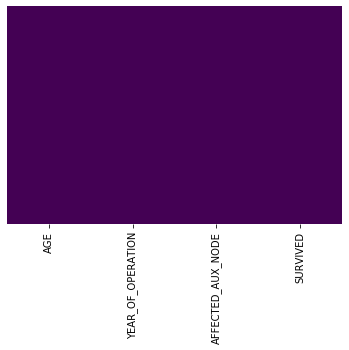

In [8]:
# isnull() tells us if columns has null or not. But its not posible to scroll whole dataset and verify..right!

# Seaborn heatmap can help here, in plotting a heat map of value 'True' as yellow line in below graph

sns.heatmap(df_patients.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Since there is no lines, meaning there is no 'True' value in isnull(), meaning this dataset doen't have missing or null value.

### Quick notes
- 'SERVIVED' is the dependent feature here.
- This dependeds on AGE, YEAR_OF_OPERATION and AFFECTED_AUX_NODE features.
- This is a imbalance dataset as servival rate is higher than death rate.
- Lets proceed to find out out of these 3, whcih all are can help in deciding if patient has servived or not.
- There is no missing/null values

## Univariate analysis - PDF, CDF, Box plot, Violin plot

- Lets start with simpest form for analysis - Univariate analysis.
- As name suggest, it deals with single variable/numeric value.
- Its doesn't help on showing how correalated 2 variables are. But it does helps in identifying pattern.
- **So, lets see between 3 independent variable which of them provides better correlation of servival rate** 

### PDF

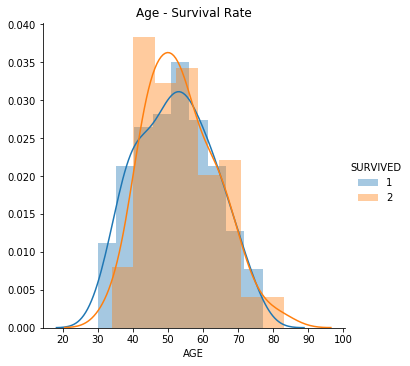

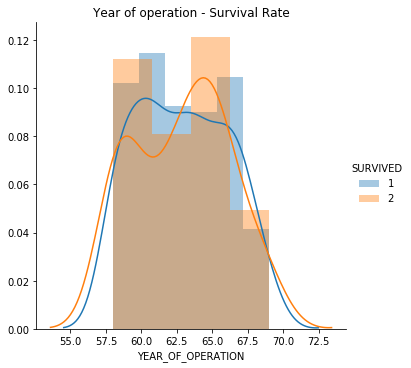

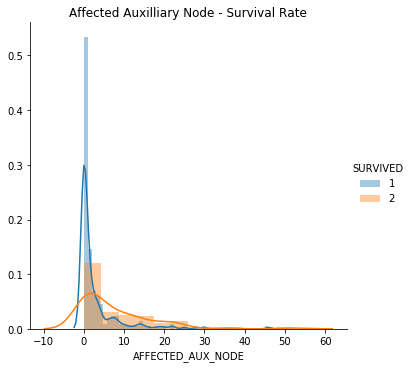

In [16]:
sns.FacetGrid(df_patients, hue="SURVIVED", height=5) \
   .map(sns.distplot, "AGE") \
   .add_legend();

plt.title("Age - Survival Rate")

sns.FacetGrid(df_patients, hue="SURVIVED", height=5) \
   .map(sns.distplot, "YEAR_OF_OPERATION") \
   .add_legend();

plt.title("Year of operation - Survival Rate")

sns.FacetGrid(df_patients, hue="SURVIVED", height=5) \
   .map(sns.distplot, "AFFECTED_AUX_NODE") \
   .add_legend();

plt.title("Affected Auxilliary Node - Survival Rate")


plt.show();

#### Observation

- Survival rate correlation with Age
    - There is massive overlap, didn't seem to be any correlation with Age

- Survival rate correlation with Year of operation
    - Same as Age, didn't seem to be any correlation with Age

- Survival rate correlation with # Affected Auxilliary Node 
    - This gives us intution that:
        - The lesser the # of affected auxilliary node, survival rate rate is higher.
        - But still, it is difficult to say - % survival rate w.r.t. # Affected Auxilliary Node 
        - Lets use CDF to have better understanding
        

### CDF

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


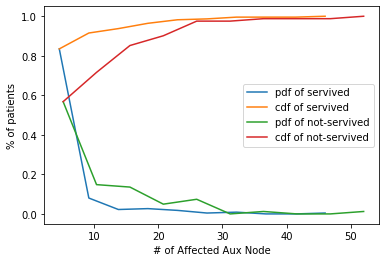

In [41]:
df_patient_survived = df_patients.loc[df_patients["SURVIVED"] == 1];
df_patient_not_survived = df_patients.loc[df_patients["SURVIVED"] == 2];

labels = ["pdf of servived", "cdf of servived", "pdf of not-servived", "cdf of not-servived"]

fig = plt.figure()

counts, bin_edges = np.histogram(df_patient_survived['AFFECTED_AUX_NODE'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(labels)
plt.xlabel("# of Affected Aux Node")
plt.ylabel("% of patients")


counts, bin_edges = np.histogram(df_patient_not_survived['AFFECTED_AUX_NODE'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(labels)
plt.xlabel("# of Affected Aux Node")
plt.ylabel("% of patients")
plt.show()

#### Observation

- With increasing number of affected aux node, sirvival rate is going down.
- Probabily, patients having **# of Affected Aux Node less than 46, has servived.**   


## Bivariate analysis - Scatter plot, pair plot

Bivariate analysis is another for of analysis, where 2 variables are involved (generally referred as X and Y). Such plots help us to understand correlation between both variables

### Scatter plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

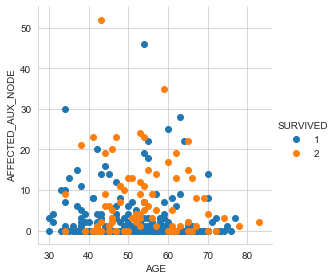

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(df_patients, hue="SURVIVED", height=4) \
   .map(plt.scatter, "AGE", "AFFECTED_AUX_NODE") \
   .add_legend();
plt.show();

#### Observation
1. Its a mixed here representation here, so based on Age and Affected node it is difficult to classify - based on age and affected aux node, if patient had survived or died. 
2. Lets use all combination of features and use pair plot for that.

## Pair plot 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

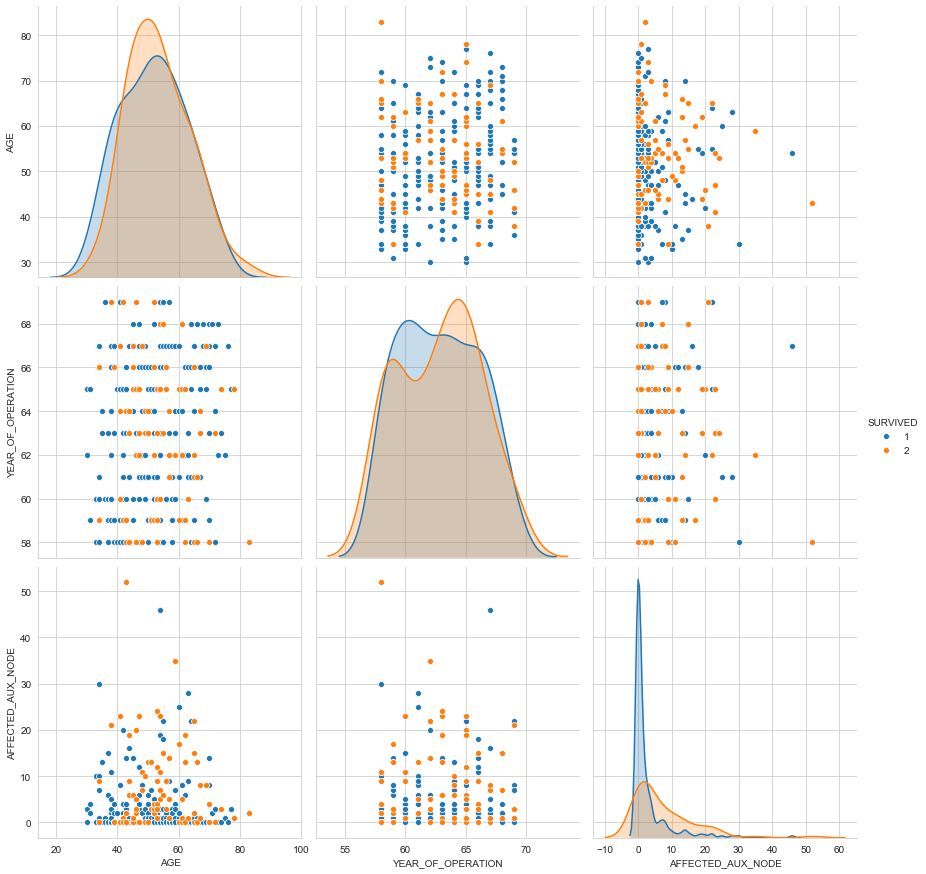

In [10]:
sns.set_style('whitegrid')

sns.pairplot(df_patients, hue='SURVIVED', height=4)
#plt.show()

#### Observation

1. There are lot of overlappings and none of the 2 features are appears correlated.
2. However, AFFECTED_AUX_NODE, gives us some intution towards survival rate. But, that is not clearly explainable.
3. With simple if-else, if its not possible to classify this dataset

## Conclusion

- It's not clearly explainable to say - which independent feature(Age, Year of operation and # Affected Aux node) is properly correlated with dependent feature (Survived/not survived).
- There are to much of overlap.
- However, # Affected Aux node provides seems to be having comparitively better correlation as compared to other two.  